### Q-1: Write a program to create an empty series.

In [1]:
import numpy as np
import pandas as pd

In [2]:
S = pd.Series()

<ipython-input-2-0739e86ddd17>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  S = pd.Series()


In [3]:
S


Series([], dtype: float64)

### Q-2: Write a Pandas program to add, subtract, multiple and divide two Pandas Series.

In [4]:
series_1  = pd.Series([10,20,30,40,50,60])
series_2 = pd.Series([100,200,300,400,500,600])

In [11]:
series_1

0    10
1    20
2    30
3    40
4    50
5    60
dtype: int64

In [5]:
series_1+series_2

0    110
1    220
2    330
3    440
4    550
5    660
dtype: int64

In [6]:
series_1-series_2

0    -90
1   -180
2   -270
3   -360
4   -450
5   -540
dtype: int64

In [7]:
series_1*series_2

0     1000
1     4000
2     9000
3    16000
4    25000
5    36000
dtype: int64

In [8]:
series_1/series_2

0    0.1
1    0.1
2    0.1
3    0.1
4    0.1
5    0.1
dtype: float64

### Q-3 Write a Pandas program to compare the elements of the two Pandas Series.

In [9]:
sample = [2,4,6,8,10],[1,3,5,7,10]

In [12]:
a = pd.Series([2,4,6,8,10])
b = pd.Series([1,3,5,7,10])

In [13]:
print(a==b)

0    False
1    False
2    False
3    False
4     True
dtype: bool


In [14]:
print(a>b)

0     True
1     True
2     True
3     True
4    False
dtype: bool


In [15]:
print(a<b)

0    False
1    False
2    False
3    False
4    False
dtype: bool


#### Q-5.Write a function to change the data type of given a column or a Series. Function takes series and data type as input, returns the converted series.

In [16]:
series = pd.Series([1,2,'Python', 2.0, True, 100])


In [18]:
def change_type(series):
    return pd.to_numeric(series, errors='coerce')

In [19]:
change_type(series)

0      1.0
1      2.0
2      NaN
3      2.0
4      1.0
5    100.0
dtype: float64

### Q-6 Find top 10 most run getter from the series.

In [20]:
url = "drive.google.com/file/d/1LRhXwbEodeWXtzPhJCX0X9Lf_BECzvqb/view"

In [25]:
batter = pd.read_csv("batsman_runs_series.csv")


In [33]:
batter.sort_values('batsman_run', ascending= False).head(10)

,batter,batsman_run
569,V Kohli,6634
462,S Dhawan,6244
130,DA Warner,5883
430,RG Sharma,5881
493,SK Raina,5536
27,AB de Villiers,5181
108,CH Gayle,4997
339,MS Dhoni,4978
452,RV Uthappa,4954
256,KD Karthik,4377


### Q-7 No of players having runs above 3000

In [35]:
batter.head(2)

,batter,batsman_run
0,A Ashish Reddy,280
1,A Badoni,161


In [40]:
batter[batter['batsman_run']>3000].value_counts().sum()

20

In [42]:
batter[batter['batsman_run']>3000].shape[0]

20

### Q-8 No of players having runs above mean value?

In [43]:
batter.head(2)

,batter,batsman_run
0,A Ashish Reddy,280
1,A Badoni,161


In [47]:
batter[batter['batsman_run'] > batter['batsman_run'].mean()].shape[0]

128

# Q-9
- i. Read `items.csv` making `item_name` as index.
- ii. Show no of nan values
- ii. Item price is given in $, so convert it to rupees without currency symbol.
- iii. Make data type of newly made series as float.
- iv. Fill nan with mean of the series

In [63]:
items = pd.read_csv('items.csv')

In [68]:
#i)

items = items.squeeze('columns')

In [93]:
# ii)

items.isna().sum()

50

In [74]:
items.head(2)

item_name
Chips and Fresh Tomato Salsa    $2.39 
Izze                            $3.39 
Name: item_price, dtype: object

In [80]:
items.isnull().sum()

50

In [81]:
items.head(2)

item_name
Chips and Fresh Tomato Salsa    $2.39 
Izze                            $3.39 
Name: item_price, dtype: object

In [86]:
# iii) 
def rupees(x):
    try:
        y = x[1:]
    except:
        y = x
    return float(y)*83

In [87]:
items.apply(rupees)

item_name
Chips and Fresh Tomato Salsa              198.37
Izze                                      281.37
Nantucket Nectar                          281.37
Chips and Tomatillo-Green Chili Salsa     198.37
Chicken Bowl                             1409.34
                                          ...   
Steak Burrito                             975.25
Steak Burrito                             975.25
Chicken Salad Bowl                        933.75
Chicken Salad Bowl                        726.25
Chicken Salad Bowl                        726.25
Name: item_price, Length: 4622, dtype: float64

In [90]:
#iv) Make data type of newly made series as float. 
items = items.apply(rupees
           )

In [95]:
# v) Fill nan with mean of the series

items.fillna(items.mean())


0

In [96]:
items.fillna(items.mean()).isna().sum()

0

# Q-10:
- i. Find mean price
- ii. Find 30th and 6th percentile value
- iii. Plot Histogram on price with bin size 50
- iv. No of items price lies between [1000 to 2000]

In [97]:
,# i) 
items.mean()

619.4316141732284

In [98]:
# ii)
items.quantile(q = 0.3)

369.35

In [99]:
items.quantile(q=0.06)

103.75

<AxesSubplot: ylabel='Frequency'>

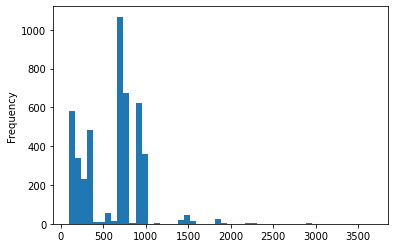

In [105]:
#iii
#Plot Histogram on price with bin size 50

items.plot(kind='hist', bins=50)

In [112]:
# iv_No of items price lies between [1000 to 2000]

items[(items > 1000) & (items < 2000)]

item_name
Chicken Bowl           1409.34
Chicken Salad Bowl     1867.50
Steak Burrito          1492.34
Chicken Burrito        1452.50
Chicken Bowl           1452.50
                        ...   
Chicken Bowl           1867.50
Steak Bowl             1950.50
Chicken Bowl           1452.50
Chips and Guacamole    1477.40
Chicken Salad Bowl     1452.50
Name: item_price, Length: 116, dtype: float64

# Task 17

In [113]:
data = {'birds': ['Cranes', 'Cranes', 'plovers', 'spoonbills', 'spoonbills', 'Cranes', 'plovers', 'Cranes', 'spoonbills', 'spoonbills', 'Cranes'], 
        'age': [3.5, 4, 1.5, np.nan, 6, 3, 5.5, np.nan, 8, 4, 3.5], 'visits': [2, 4, 3, 4, 3, 4, 2, 2, 3, 2, 2], 
        'priority': ['yes', 'yes', 'no', np.nan, 'no', 'no', 'no', 'yes', 'no', 'no','yes']}

In [114]:
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']

# Q-1:
- i. Create a DataFrame birds from the above dictionary data which has the index labels.

- ii. Display basic information about the dataFrame.

- iii. Show Alternate rows of the dataframe.

In [121]:
# i)
birds = pd.DataFrame(data, index=labels)

In [122]:
birds

,birds,age,visits,priority
a,Cranes,3.5,2,yes
b,Cranes,4.0,4,yes
c,plovers,1.5,3,no
d,spoonbills,NaN,4,NaN
e,spoonbills,6.0,3,no
f,Cranes,3.0,4,no
g,plovers,5.5,2,no
h,Cranes,NaN,2,yes
i,spoonbills,8.0,3,no
j,spoonbills,4.0,2,no


In [123]:
# ii
birds.describe()

,age,visits
count,9.000000,11.000000
mean,4.333333,2.818182
std,1.903943,0.873863
min,1.500000,2.000000
25%,3.500000,2.000000
50%,4.000000,3.000000
75%,5.500000,3.500000
max,8.000000,4.000000


In [124]:
birds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, a to k
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   birds     11 non-null     object 
 1   age       9 non-null      float64
 2   visits    11 non-null     int64  
 3   priority  10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 440.0+ bytes


In [125]:
# iii
birds.iloc[::2,:]

,birds,age,visits,priority
a,Cranes,3.5,2,yes
c,plovers,1.5,3,no
e,spoonbills,6.0,3,no
g,plovers,5.5,2,no
i,spoonbills,8.0,3,no
k,Cranes,3.5,2,yes


# Q-2:
- i. Show only rows [1st, 3rd, 7th] from columns ['bird', 'age']

- ii. Select rows where the number of visits is less than 4.

In [133]:
birds[['birds', 'age']].iloc[[0,2,6]]

,birds,age
a,Cranes,3.5
c,plovers,1.5
g,plovers,5.5


In [149]:
birds[birds['visits']<4]

,birds,age,visits,priority
a,Cranes,3.5,2,yes
c,plovers,1.5,3,no
e,spoonbills,6.0,3,no
g,plovers,5.5,2,no
h,Cranes,NaN,2,yes
i,spoonbills,8.0,3,no
j,spoonbills,4.0,2,no
k,Cranes,3.5,2,yes


# Q-3:
- i. Select all rows with nan values in age and visits column.

- ii. Fill nan with respective series mode value.

In [135]:
birds

,birds,age,visits,priority
a,Cranes,3.5,2,yes
b,Cranes,4.0,4,yes
c,plovers,1.5,3,no
d,spoonbills,NaN,4,NaN
e,spoonbills,6.0,3,no
f,Cranes,3.0,4,no
g,plovers,5.5,2,no
h,Cranes,NaN,2,yes
i,spoonbills,8.0,3,no
j,spoonbills,4.0,2,no


In [173]:
birds[(birds['age'].isnull()) | (birds['visits'].isnull())]

,birds,age,visits,priority


In [172]:
birds.age.fillna(birds.age.mode()[0], inplace = True)
birds.visits.fillna(birds.visits.mode()[0], inplace = True)

# Q-4
- i. Find the total number of visits of the bird Cranes

- ii. Find the number of each type of birds in dataframe.

- iii. Print no of duplicate rows

- iv. Drop Duplicates rows and make this changes permanent. Show dataframe after changes.

In [157]:
# i)
birds[birds['birds']== 'Cranes']['visits'].sum()

14

In [162]:
# ii)
birds['birds'].value_counts()

Cranes        5
spoonbills    4
plovers       2
Name: birds, dtype: int64

In [174]:
#iii)
birds.duplicated().sum()

0

In [166]:
# iv)
birds.drop_duplicates(inplace= True)

In [167]:
birds

,birds,age,visits,priority
a,Cranes,3.5,2,yes
b,Cranes,4.0,4,yes
c,plovers,1.5,3,no
d,spoonbills,NaN,4,NaN
e,spoonbills,6.0,3,no
f,Cranes,3.0,4,no
g,plovers,5.5,2,no
h,Cranes,NaN,2,yes
i,spoonbills,8.0,3,no
j,spoonbills,4.0,2,no


## Q5) In IPL matches dataset some teams name has changed.
You will have to consider them as same.

- 'Delhi Capitals' formerly as 'Delhi Daredevils' 
- 'Punjab Kings' formerly as 'Kings XI Punjab'
- 'Rising Pune Supergiant' formerly as 'Rising Pune Supergiants'

You need to make changes accordingly. Consider current name for each teams.

Be careful Gujrat Titans and Gujrat Lions are different teams.

In [169]:
ipl = pd.read_csv("ipl_matches_2008_2022.csv")

In [170]:
ipl

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,N,Kolkata Knight Riders,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,N,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper
947,335984,Delhi,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,N,Delhi Daredevils,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar
948,335983,Chandigarh,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,N,Chennai Super Kings,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri


In [175]:
ipl

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,N,Kolkata Knight Riders,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,N,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper
947,335984,Delhi,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,N,Delhi Daredevils,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar
948,335983,Chandigarh,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,N,Chennai Super Kings,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri


In [176]:
change_name = {"Delhi Daredevils": "Delhi Capitals",
              'Kings XI Punjab': 'Punjab Kings',
              'Rising Pune Supergiants': "Rising Pune Supergiant"}

In [178]:
ipl.replace(change_name.keys(), change_name.values(), inplace=True)

#### Q-6 Write a code which can display the bar chart of top 5 teams who have played maximum number of matches in the IPL.

In [179]:
ipl.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


<AxesSubplot: >

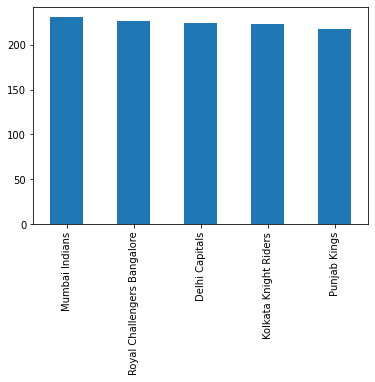

In [184]:
(ipl.Team1.value_counts() + ipl.Team2.value_counts()).sort_values(ascending=False).head(5).plot(kind='bar')

### Q-7: Player who got Most no. of player of the match award playing against Mumbai Indians.

In [185]:
ipl.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


In [203]:
m1 = (ipl.Team1== 'Mumbai Indians') | (ipl.Team2 == 'Mumbai Indians' )
m2 = ipl.WinningTeam != 'Mumbai Indians'
ipl[m1 & m2].Player_of_Match.value_counts().head(1)

SPD Smith    4
Name: Player_of_Match, dtype: int64

### Q-8: Team1 vs Team2 Dashbord
Create a function which will take two string(name of two teams) as input. Show win Loss record between them and player getting most player of the match award in matches between these two teams.

team1_vs_team2('Kolkata Knight Riders','Chennai Super Kings')

In [204]:
def team1vsteam2(t1,t2):
    m1 = (ipl.Team1== t1) | (ipl.Team2 == t1 )
    m2 = (ipl.Team1== t2) | (ipl.Team2 == t2 )
    df1 = ipl[m1 & m2]
    print(df1.WinningTeam.value_counts())

In [205]:
team1vsteam2('Kolkata Knight Riders','Chennai Super Kings')

Chennai Super Kings      17
Kolkata Knight Riders     9
Name: WinningTeam, dtype: int64


### Q-9: Find out the top 7 cities where the matches of Kolkata Knight Riders are played frequently and plot the result as bar chart.

In [206]:
ipl.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


<AxesSubplot: >

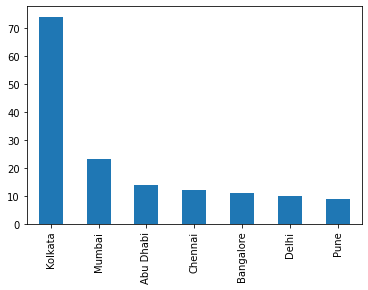

In [211]:
ipl[(ipl.Team1== 'Kolkata Knight Riders') | (ipl.Team2 == 'Kolkata Knight Riders')]['City'].value_counts().head(7).plot(kind='bar')
 

### Q-10: Find out the average margin for the team Mumbai Indians for only the session 2011.

In [212]:
ipl.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


In [218]:
ipl[((ipl.Team1== 'Mumbai Indians') | (ipl.Team2 == 'Mumbai Indians')) & (ipl.Season == '2011')].Margin.mean()

19.25

# Task 18

In [220]:
fifa = pd.read_csv('Fifa Worldcup 2022.csv')

In [223]:
fifa.columns

Index(['Sl. No', 'Match No.', 'Team', 'Against', 'Group', 'Goal',
       'Possession (%)', 'Inside Penalty Area', 'Outside Penalty Area',
       'Assists', 'Total Attempts', 'On Target', 'Off Target',
       'Target in Penalty', 'Target from Outside', 'Left Channel',
       'Left Inside Channel', 'Central Channel', 'Right Inside Channel',
       'Right Channel', 'Receptions MD', 'Receptions D',
       'Attempted Line Breaks', 'Completed Line Breaks',
       'Attempted Defensive Line Breaks', 'Completed Defensive Line Breaks',
       'Yellow Cards', 'Red Cards', 'Fouls Against', 'Offsides', 'Passes',
       'Passes Completed', 'Crosses', 'Crosses Completed', 'Corners',
       'Free Kicks', 'Penalties Scored', 'Pts'],
      dtype='object')

#### `Q-1:` Use the football dataset. Find out the total percentages that each team made on target. Display the result as a python dictionary where the keys are the team list and the values are the percentage values. Round off the percentage values up to 2 decimal places.

*Help:*
- First, find out how many total teams are participated in this worldcup. For that, you can use `unique()` method on the column "Team" or "Against".
- Loop through the teams list that you have found in previous section, and then filter the dataset according to that. After filtering the dataset, find out total attempts sum and total on target sum.
- After getting these values, find out the percentage by total on target divided by total attempts and multiply by 100. And store to a python dictionary where the key will be the team name and the values will be the percentages. 
- At the end,sort the dictionary by the values (not by the keys) and print the result.


In [226]:
fifa.head(2)

,Sl. No,Match No.,Team,Against,Group,Goal,Possession (%),Inside Penalty Area,Outside Penalty Area,Assists,Total Attempts,On Target,Off Target,Target in Penalty,Target from Outside,Left Channel,Left Inside Channel,Central Channel,Right Inside Channel,Right Channel,Receptions MD,Receptions D,Attempted Line Breaks,Completed Line Breaks,Attempted Defensive Line Breaks,Completed Defensive Line Breaks,Yellow Cards,Red Cards,Fouls Against,Offsides,Passes,Passes Completed,Crosses,Crosses Completed,Corners,Free Kicks,Penalties Scored,Pts
0,1,1,Qatar,Ecuador,A,0,40,0,0,0,5,0,5,2,3,15,0,3,1,9,45,5,159,100,6,4,4,0,15,3,453,387,10,5,1,19,0,0
1,2,1,Ecuador,Qatar,A,2,46,2,0,1,5,5,2,4,1,8,7,6,4,6,55,10,159,103,6,4,2,0,15,4,484,419,26,10,3,17,1,3


In [225]:
pd.set_option('display.max_columns', None)

In [253]:
all_teams = fifa["Team"].unique()
on_target_percentage = {}
for team in all_teams:
    total_attempts = fifa[fifa['Team'] == team]['Total Attempts'].sum()
    total_on_target = fifa[fifa['Team'] == team]['On Target'].sum()
    on_target_percentage[team] = round(total_on_target/total_attempts*100,2)
dict(sorted(on_target_percentage.items(), key = lambda x: x[1], reverse=True))

{'Costa Rica': 54.55,
 'Cameroon': 51.85,
 'Ecuador': 48.15,
 'Argentina': 46.15,
 'Brazil': 45.56,
 'England': 45.0,
 'Portugal': 40.32,
 'Ghana': 40.0,
 'Netherlands': 39.02,
 'Korea Republic': 36.73,
 'Australia': 36.0,
 'Mexico': 34.88,
 'France': 34.65,
 'Germany': 34.33,
 'Croatia': 33.73,
 'Spain': 32.69,
 'Belgium': 32.35,
 'Serbia': 32.26,
 'Iran': 31.43,
 'Uruguay': 31.25,
 'United States': 31.11,
 'Saudi Arabia': 31.03,
 'Senegal': 30.77,
 'Denmark': 30.56,
 'Switzerland': 30.56,
 'Japan': 30.23,
 'Wales': 29.17,
 'Qatar': 28.57,
 'Morocco': 28.33,
 'Tunisia': 26.67,
 'Poland': 25.0,
 'Canada': 17.65}

### Q-2: Find out how many times the teams are played in this Fifa Worldcup-2022. On top of this, find out the ranks of the teams.

In [254]:
fifa

,Sl. No,Match No.,Team,Against,Group,Goal,Possession (%),Inside Penalty Area,Outside Penalty Area,Assists,Total Attempts,On Target,Off Target,Target in Penalty,Target from Outside,Left Channel,Left Inside Channel,Central Channel,Right Inside Channel,Right Channel,Receptions MD,Receptions D,Attempted Line Breaks,Completed Line Breaks,Attempted Defensive Line Breaks,Completed Defensive Line Breaks,Yellow Cards,Red Cards,Fouls Against,Offsides,Passes,Passes Completed,Crosses,Crosses Completed,Corners,Free Kicks,Penalties Scored,Pts
0,1,1,Qatar,Ecuador,A,0,40,0,0,0,5,0,5,2,3,15,0,3,1,9,45,5,159,100,6,4,4,0,15,3,453,387,10,5,1,19,0,0
1,2,1,Ecuador,Qatar,A,2,46,2,0,1,5,5,2,4,1,8,7,6,4,6,55,10,159,103,6,4,2,0,15,4,484,419,26,10,3,17,1,3
2,3,2,England,Iran,B,6,69,6,0,6,13,7,3,10,3,11,5,2,3,11,72,15,133,94,8,6,0,0,9,2,810,733,29,9,8,16,0,3
3,4,2,Iran,England,B,2,20,2,0,1,8,3,4,6,2,3,0,3,1,1,34,1,56,19,1,1,2,0,14,2,232,156,11,3,0,10,1,0
4,5,3,Senegal,Netherlands,A,0,39,0,0,0,15,4,7,8,7,12,4,2,4,13,101,12,143,86,6,6,2,0,13,2,391,326,22,8,6,14,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,124,62,Morocco,Fram,F,0,55,0,0,0,13,1,6,8,5,10,4,6,6,19,74,15,141,95,18,11,1,0,11,3,583,518,22,1,3,15,0,0
124,125,63,Croatia,Morocco,F,2,45,2,0,2,14,4,8,7,7,20,8,3,2,7,106,15,164,114,23,12,0,0,13,2,491,430,21,3,6,13,0,3
125,126,63,Morocco,Croatia,F,1,45,1,0,0,7,2,5,5,2,13,1,3,7,16,75,10,150,97,14,8,2,0,11,2,494,428,20,5,3,15,0,0
126,127,64,Argentina,France,C,3,46,3,0,1,21,9,9,13,8,13,6,8,9,9,163,28,249,172,40,24,4,0,26,4,648,544,20,4,6,22,5,3


In [255]:
fifa['Team'].value_counts()

Morocco           7
Croatia           7
Argentina         7
France            7
England           5
Brazil            5
Netherlands       5
Portugal          5
Poland            4
Japan             4
Switzerland       4
Australia         4
Korea Republic    4
United States     4
Senegal           4
Spain             4
Cameroon          3
Uruguay           3
Belgium           3
Ghana             3
Canada            3
Qatar             3
Costa Rica        3
Germany           3
Ecuador           3
Mexico            3
Tunisia           3
Denmark           3
Saudi Arabia      3
Wales             3
Iran              3
Serbia            3
Name: Team, dtype: int64

In [256]:
fifa['Team'].value_counts().rank(method='first')

Morocco           29.0
Croatia           30.0
Argentina         31.0
France            32.0
England           25.0
Brazil            26.0
Netherlands       27.0
Portugal          28.0
Poland            17.0
Japan             18.0
Switzerland       19.0
Australia         20.0
Korea Republic    21.0
United States     22.0
Senegal           23.0
Spain             24.0
Cameroon           1.0
Uruguay            2.0
Belgium            3.0
Ghana              4.0
Canada             5.0
Qatar              6.0
Costa Rica         7.0
Germany            8.0
Ecuador            9.0
Mexico            10.0
Tunisia           11.0
Denmark           12.0
Saudi Arabia      13.0
Wales             14.0
Iran              15.0
Serbia            16.0
Name: Team, dtype: float64

### `Q-3:` Find out these below topics:
- The information about the Fifa worldcup dataset.
- The description about the Fifa worldcup dataset
- Check is there any missing values, if there is any missing values, fill that value with the average value for that particular column.
- Drop all the duplicate rows permanently.
- Drop the columns: "Sl No", "Match No.", "Red Cards" and "Pts" permanently. 

In [257]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Sl. No                           128 non-null    int64 
 1   Match No.                        128 non-null    int64 
 2   Team                             128 non-null    object
 3   Against                          128 non-null    object
 4   Group                            128 non-null    object
 5   Goal                             128 non-null    int64 
 6   Possession (%)                   128 non-null    int64 
 7   Inside Penalty Area              128 non-null    int64 
 8   Outside Penalty Area             128 non-null    int64 
 9   Assists                          128 non-null    int64 
 10  Total Attempts                   128 non-null    int64 
 11  On Target                        128 non-null    int64 
 12  Off Target                       128

In [262]:
fifa.describe()

,Sl. No,Match No.,Goal,Possession (%),Inside Penalty Area,Outside Penalty Area,Assists,Total Attempts,On Target,Off Target,Target in Penalty,Target from Outside,Left Channel,Left Inside Channel,Central Channel,Right Inside Channel,Right Channel,Receptions MD,Receptions D,Attempted Line Breaks,Completed Line Breaks,Attempted Defensive Line Breaks,Completed Defensive Line Breaks,Yellow Cards,Red Cards,Fouls Against,Offsides,Passes,Passes Completed,Crosses,Crosses Completed,Corners,Free Kicks,Penalties Scored,Pts
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,64.500000,32.500000,1.343750,43.476562,1.203125,0.117188,0.914062,11.257812,4.007812,4.835938,6.914062,4.343750,13.562500,4.671875,4.906250,4.648438,12.234375,92.703125,12.453125,169.281250,109.476562,14.812500,8.265625,1.726562,0.023438,12.320312,1.976562,502.859375,430.929688,19.523438,4.898438,4.468750,14.250000,0.335938,1.429688
std,37.094474,18.545539,1.342448,11.442403,1.324270,0.322907,1.150333,5.406683,2.588576,2.610630,3.998085,2.733397,6.901729,2.886595,3.080131,2.936573,6.176517,29.440547,18.152399,34.120661,30.776298,7.230458,5.101311,1.514834,0.151883,4.691983,1.731891,160.160487,160.893724,8.596799,3.520111,2.774852,4.712189,0.941412,1.389973
min,1.000000,1.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,32.000000,0.000000,56.000000,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,225.000000,156.000000,4.000000,0.000000,0.000000,5.000000,0.000000,0.000000
25%,32.750000,16.750000,0.000000,35.000000,0.000000,0.000000,0.000000,7.750000,2.000000,3.000000,4.000000,3.000000,8.000000,2.000000,3.000000,3.000000,8.000000,72.750000,7.000000,149.500000,87.750000,10.000000,5.000000,1.000000,0.000000,9.000000,1.000000,398.250000,323.250000,13.000000,3.000000,2.000000,11.000000,0.000000,0.000000
50%,64.500000,32.500000,1.000000,45.000000,1.000000,0.000000,1.000000,10.000000,4.000000,4.000000,6.000000,4.000000,12.000000,4.500000,4.000000,4.000000,11.000000,93.000000,9.000000,170.500000,106.000000,15.000000,8.000000,2.000000,0.000000,12.000000,2.000000,495.500000,419.000000,19.000000,4.000000,4.000000,14.000000,0.000000,1.000000
75%,96.250000,48.250000,2.000000,51.000000,2.000000,0.000000,1.000000,14.000000,6.000000,6.000000,9.000000,5.000000,18.000000,7.000000,6.250000,6.000000,16.250000,111.250000,14.000000,188.000000,129.000000,20.000000,11.000000,2.000000,0.000000,15.000000,3.000000,589.500000,519.750000,24.000000,6.000000,6.000000,17.000000,0.000000,3.000000
max,128.000000,64.000000,7.000000,78.000000,7.000000,1.000000,6.000000,32.000000,13.000000,17.000000,24.000000,15.000000,36.000000,13.000000,16.000000,19.000000,29.000000,186.000000,192.000000,259.000000,192.000000,40.000000,27.000000,8.000000,1.000000,30.000000,10.000000,1070.000000,994.000000,53.000000,25.000000,14.000000,30.000000,5.000000,3.000000


In [270]:
fifa.isnull()
fifa.isna().sum()

Sl. No                             0
Match No.                          0
Team                               0
Against                            0
Group                              0
Goal                               0
Possession (%)                     0
Inside Penalty Area                0
Outside Penalty Area               0
Assists                            0
Total Attempts                     0
On Target                          0
Off Target                         0
Target in Penalty                  0
Target from Outside                0
Left Channel                       0
Left Inside Channel                0
Central Channel                    0
Right Inside Channel               0
Right Channel                      0
Receptions MD                      0
Receptions D                       0
Attempted Line Breaks              0
Completed Line Breaks              0
Attempted Defensive Line Breaks    0
Completed Defensive Line Breaks    0
Yellow Cards                       0
R

In [271]:
fifa.drop_duplicates(inplace=True)

In [272]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128 entries, 0 to 127
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Sl. No                           128 non-null    int64 
 1   Match No.                        128 non-null    int64 
 2   Team                             128 non-null    object
 3   Against                          128 non-null    object
 4   Group                            128 non-null    object
 5   Goal                             128 non-null    int64 
 6   Possession (%)                   128 non-null    int64 
 7   Inside Penalty Area              128 non-null    int64 
 8   Outside Penalty Area             128 non-null    int64 
 9   Assists                          128 non-null    int64 
 10  Total Attempts                   128 non-null    int64 
 11  On Target                        128 non-null    int64 
 12  Off Target                       128

In [278]:
#Drop the columns: "Sl No", "Match No.", "Red Cards" and "Pts" permanently.

fifa.drop(columns=['Sl. No', 'Match No.','Red Cards','Pts'], inplace= True)

In [279]:
fifa.head(2)

,Team,Against,Group,Goal,Possession (%),Inside Penalty Area,Outside Penalty Area,Assists,Total Attempts,On Target,Off Target,Target in Penalty,Target from Outside,Left Channel,Left Inside Channel,Central Channel,Right Inside Channel,Right Channel,Receptions MD,Receptions D,Attempted Line Breaks,Completed Line Breaks,Attempted Defensive Line Breaks,Completed Defensive Line Breaks,Yellow Cards,Fouls Against,Offsides,Passes,Passes Completed,Crosses,Crosses Completed,Corners,Free Kicks,Penalties Scored
0,Qatar,Ecuador,A,0,40,0,0,0,5,0,5,2,3,15,0,3,1,9,45,5,159,100,6,4,4,15,3,453,387,10,5,1,19,0
1,Ecuador,Qatar,A,2,46,2,0,1,5,5,2,4,1,8,7,6,4,6,55,10,159,103,6,4,2,15,4,484,419,26,10,3,17,1


### Q-4: Do these below operations:
- Find out the rank based on the "Team" column and save the result by adding a new column named "Rank".
- Change the datatype of this column to integer by using np.int16
- Set the index of the DataFrame by using this "Rank" column permanently.
- After that, sort the dataframe based on the "Rank" index.

In [281]:
fifa['rank'] = fifa['Team'].rank()

In [283]:
fifa.head(2)

,Team,Against,Group,Goal,Possession (%),Inside Penalty Area,Outside Penalty Area,Assists,Total Attempts,On Target,Off Target,Target in Penalty,Target from Outside,Left Channel,Left Inside Channel,Central Channel,Right Inside Channel,Right Channel,Receptions MD,Receptions D,Attempted Line Breaks,Completed Line Breaks,Attempted Defensive Line Breaks,Completed Defensive Line Breaks,Yellow Cards,Fouls Against,Offsides,Passes,Passes Completed,Crosses,Crosses Completed,Corners,Free Kicks,Penalties Scored,rank
0,Qatar,Ecuador,A,0,40,0,0,0,5,0,5,2,3,15,0,3,1,9,45,5,159,100,6,4,4,15,3,453,387,10,5,1,19,0,96.0
1,Ecuador,Qatar,A,2,46,2,0,1,5,5,2,4,1,8,7,6,4,6,55,10,159,103,6,4,2,15,4,484,419,26,10,3,17,1,40.0


In [286]:
fifa['rank'] = fifa['rank'].astype(np.int16)

In [291]:
fifa.set_index('rank', inplace=True)

In [292]:
fifa.sort_index()

,Team,Against,Group,Goal,Possession (%),Inside Penalty Area,Outside Penalty Area,Assists,Total Attempts,On Target,Off Target,Target in Penalty,Target from Outside,Left Channel,Left Inside Channel,Central Channel,Right Inside Channel,Right Channel,Receptions MD,Receptions D,Attempted Line Breaks,Completed Line Breaks,Attempted Defensive Line Breaks,Completed Defensive Line Breaks,Yellow Cards,Fouls Against,Offsides,Passes,Passes Completed,Crosses,Crosses Completed,Corners,Free Kicks,Penalties Scored
rank,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,Argentina,Mexico,C,2,50,1,1,2,5,2,3,2,3,10,6,2,4,12,89,2,150,100,10,5,1,15,2,533,464,14,2,4,23,0
4,Argentina,Netherlands,C,2,44,2,0,1,15,6,8,5,10,7,7,13,6,17,104,7,203,122,24,8,8,18,2,603,511,16,4,8,30,5
4,Argentina,Saudi Arabia,C,1,51,1,0,0,14,6,6,10,4,12,4,5,8,18,91,27,195,127,10,8,0,7,10,593,525,36,15,9,21,1
4,Argentina,France,C,3,46,3,0,1,21,9,9,13,8,13,6,8,9,9,163,28,249,172,40,24,4,26,4,648,544,20,4,6,22,5
4,Argentina,Croatia,C,3,34,3,0,1,10,7,2,7,3,8,9,7,3,2,121,7,147,91,17,7,2,15,1,408,344,8,2,2,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,Uruguay,Ghana,H,2,39,2,0,1,12,7,5,7,5,7,2,13,3,17,186,14,186,124,24,14,3,11,2,446,361,15,4,2,20,0
124,Uruguay,Portugal,H,0,35,0,0,0,10,3,6,6,4,13,8,4,5,9,94,6,150,86,17,11,2,16,0,390,306,18,5,2,13,0
127,Wales,Iran,B,0,51,0,0,0,10,3,4,5,5,18,3,8,11,13,101,13,208,129,17,8,1,9,2,508,413,20,5,2,12,0


### Questions on Titanic dataset.

You can get the dataset from [here](https://www.kaggle.com/competitions/titanic). This is the competition page on Kaggle. To download the dataset from here, I guess you have to register for the compition. So, do so and then download the dataset.

Also, for now you can use this url to read the dataset like before: 
- dataset 1: https://docs.google.com/spreadsheets/d/e/2PACX-1vQjh5HzZ1N0SU7ME9ZQRzeVTaXaGsV97rU8R7eAcg53k27GTstJp9cRUOfr55go1GRRvTz1NwvyOnuh/pub?gid=1562145139&single=true&output=csv
- dataset 2: https://docs.google.com/spreadsheets/d/e/2PACX-1vQcPvQsSC9aNFogvbUG08nu0bGHlOclGYaOlhND_LE5Ff7ZnHQ5VYzAgpyT5XNklgiT54SsNgHePsUa/pub?gid=1656109608&single=true&output=csv

In [293]:
dataset1 = pd.read_csv("train - train.csv")

In [294]:
dataset2 = pd.read_csv("test - test.csv")

### Q-5: Do the below tasks:
- With dataset 1, drop those records which only have missing values of the "Age" column permanently.

- With the dataset 2, fill the missing values with 20 to the only "Age" column permanently.

In [299]:
dataset1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [297]:
dataset1[dataset1['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [304]:
dataset1.dropna(subset=['Age'], inplace= True)

In [305]:
dataset1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [306]:
dataset2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [309]:
dataset2['Age'].fillna(20, inplace= True)

In [310]:
dataset2['Age'].isna().sum()

0

### Questions on IPL wala dataset
matches dataset = https://drive.google.com/file/d/1yKVUuexl6lIKuFQy7uIPgDgXhJ0L4SIg/view?usp=share_link

Code to directly use in colab

ipl_matches = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRy2DUdUbaKx_Co9F0FSnIlyS-8kp4aKv_I0-qzNeghiZHAI_hw94gKG22XTxNJHMFnFVKsO4xWOdIs/pub?gid=1655759976&single=true&output=csv"

#### Q-6: Make a dataframe of each team in IPL with details like - Team Name, Matches Played, Win%, Home Win%, Away Win%.
Show sorted dataframe on Win%

Replace old team name as new name before performing any tasks.

Delhi Daredevils ->Delhi Capitals
Kings XI Punjab -> Punjab Kings
Rising Pune Supergiants -> Rising Pune Supergiant
Note: Team1 represents Home team. Exclude not result matches.

In [312]:
ipl['Team1'].value_counts()

Royal Challengers Bangalore    126
Delhi Capitals                 114
Mumbai Indians                 112
Chennai Super Kings            111
Punjab Kings                   110
Kolkata Knight Riders          105
Rajasthan Royals                89
Sunrisers Hyderabad             69
Deccan Chargers                 39
Pune Warriors                   23
Gujarat Lions                   16
Rising Pune Supergiant          14
Lucknow Super Giants             8
Gujarat Titans                   7
Kochi Tuskers Kerala             7
Name: Team1, dtype: int64

In [313]:
ipl.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


In [335]:
df = ipl[~ipl.WinningTeam.isna()]
new_df = pd.DataFrame()
teams = df["Team1"].unique()
data = []
for team in teams:
    played = df[(df["Team1"] == team) | (df["Team2"] == team)].shape[0]
    wins = df[df["WinningTeam"]== team].shape[0]
    home_win = df[(df["WinningTeam"] == team) |( df['Team1']== team)].shape[0]/df[df["Team1"] == team].shape[0]*100
    away_win = df[(df["WinningTeam"] == team) |( df['Team2']== team)].shape[0]/df[df["Team2"] == team].shape[0]*100
    data.append([team, played, wins/played*100, home_win, away_win])
new_df[['Team','Matches_played','Win_percentage','Home_win_percentage','Away_win_percentage']] = data
new_df

,Team,Matches_played,Win_percentage,Home_win_percentage,Away_win_percentage
0,Rajasthan Royals,190,50.526316,152.808989,148.514851
1,Royal Challengers Bangalore,223,48.878924,139.02439,161.0
2,Sunrisers Hyderabad,152,49.342105,156.521739,143.373494
3,Delhi Capitals,222,46.396396,144.247788,148.623853
4,Chennai Super Kings,208,58.173077,150.45045,167.010309
5,Gujarat Titans,16,75.0,214.285714,144.444444
6,Lucknow Super Giants,15,60.0,125.0,200.0
7,Kolkata Knight Riders,223,51.121076,155.238095,147.457627
8,Punjab Kings,218,46.330275,146.363636,146.296296
9,Mumbai Indians,231,56.709957,158.928571,154.621849


In [336]:
new_df.sort_values("Win_percentage", inplace=True, ascending=False)

In [337]:
new_df

,Team,Matches_played,Win_percentage,Home_win_percentage,Away_win_percentage
5,Gujarat Titans,16,75.0,214.285714,144.444444
6,Lucknow Super Giants,15,60.0,125.0,200.0
4,Chennai Super Kings,208,58.173077,150.45045,167.010309
9,Mumbai Indians,231,56.709957,158.928571,154.621849
7,Kolkata Knight Riders,223,51.121076,155.238095,147.457627
0,Rajasthan Royals,190,50.526316,152.808989,148.514851
10,Rising Pune Supergiant,30,50.0,157.142857,143.75
2,Sunrisers Hyderabad,152,49.342105,156.521739,143.373494
1,Royal Challengers Bangalore,223,48.878924,139.02439,161.0
3,Delhi Capitals,222,46.396396,144.247788,148.623853


### Q-7: Venues with most "no result" matches.



In [350]:
ipl[ipl['WonBy'] == 'NoResults']['Venue'].value_counts()

M Chinnaswamy Stadium    2
M.Chinnaswamy Stadium    1
Feroz Shah Kotla         1
Name: Venue, dtype: int64

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


### Q-8: Player with most appearance in final match.

In [351]:
ipl.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


In [354]:
df_final = ipl[ipl["MatchNumber"] == 'Final']

In [363]:
def getPlayer(l):
    return pd.Series(list(map(lambda x: x.strip("'"), l.lstrip("'[").rstrip("]'").split(", "))))
    

df_final = ipl[ipl["MatchNumber"] == 'Final']
playerseries = pd.Series()

for player_list in df_final['Team1Players']:
    x = getPlayer(player_list)
    playerseries = playerseries.append(x)

for player_list in df_final['Team2Players']:
    x = getPlayer(player_list)
    playerseries = playerseries.append(x)
    
playerseries.value_counts().head()


<ipython-input-363-029e33b2d8d5>:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  playerseries = pd.Series()
<ipython-input-363-029e33b2d8d5>:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  playerseries = playerseries.append(x)
<ipython-input-363-029e33b2d8d5>:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  playerseries = playerseries.append(x)
<ipython-input-363-029e33b2d8d5>:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  playerseries = playerseries.append(x)
<ipython-input-363-029e33b2d8d5>:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future versio

MS Dhoni     10
SK Raina      8
AT Rayudu     7
R Ashwin      7
DJ Bravo      7
dtype: int64

### Q-9: IPL Point Table
Make a function point_table which take season as parameter and show points table in non-ascendng order of points and in ascending order of team name.

For winning - 2 Ponits; For loosing - 0 Point For not result both team gets 1 points.

Make dataframe which will have TeamName MatchesPlayed MatchesWon NoResult Points make TeamName as index.

season parametr should be one of these->
['2022', '2021', '2020/21', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2009/10', '2009', '2007/08']

In [368]:
def matches_played(df,team):
    return df[(df['Team1'] == team) | (df['Team2'] == team)].shape[0]

def match_won(df, team):
    return df[df['WinningTeam'] == team].shape[0]

def match_no_result(df,team):
    return df[(df['Team1'] == team )| (df['Team2'] == team) & (df['WinningTeam'].isnull())].shape[0]

In [397]:
def point_table(season):
    df = ipl[ipl['Season'] == season]
    new_df = pd.DataFrame()
    new_df['Team Name'] == df['Team1'].unique()
    new_df['Matches Played'] == new_df['Team Name'].apply(lambda x: matches_played(df,x))
    new_df['Matches Won'] == new_df['Team Name'].apply(lambda x: matches_won(df,x))
    new_df['No Result'] == new_df['Team Name'].apply(lambda x: matches_no_result(df,x))
    new_df['points'] = new_df['Matches Won']*2 + new_df['No Result']
    new_df.sort_values("points", ascending= False, inplace=True)
    new_df.set_index('Team Name', inplace = True)
    return new_df

point_table("2021")
    



KeyError: 'Team Name1'

Q-10: IPL Point Table cont.
Extend the above IPL Point Table with an extra column as SeasonPosition

Team below top 4 after sorting on Points and then on TeamName Will have same SeasonPosition as there rank. use rank function.

Teams in Top four will have SeasonPosition as:

    'Winner' - Team won final
    'Runner' - Team lost Final
    3 - Losing Team in Qualifier2
    4 - Losing Team in Eliminator
For changing value of pariticular cell use df.at[row_index, col_label] = value

Output of two Top 2 in season 2022. Your result should have all teams.

TeamName    MatchesPlayed    MatchesWon    NoResult    Points   SeasonPosition

Gujarat Titans        16       12           0         24         Winner
Rajasthan Royals      17       10           0         20         Runner
Note: If you try to chnage value of view of any dataframe a warnig will be shown. To avoid it, make a copy of the dataframe you want to change in by df.copy()